# Enlace a la Presentación en .pdf: https://drive.google.com/file/d/1MXOm3u4n_xyLIH5VGkYPNKQHvvxIJ2pX/view?usp=sharing

# Enlace al Dashboard en Tableau Public: https://public.tableau.com/app/profile/fernando.ojeda/viz/Proyecto_Final_FOJEDA_Dashboard/DashboardFinal?publish=yes

# Proyecto Final de Data Analytics

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

- Lleva a cabo el análisis exploratorio de datos
- Identificar operadores ineficaces
- Prueba las hipótesis estadísticas

# Descripción de los datos

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

## Paso 1. Importación de librerías y carga de dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind

In [2]:
# Cargar los datasets

clients_df = pd.read_csv('/datasets/telecom_clients_us.csv')
telecom_df = pd.read_csv('/datasets/telecom_dataset_us.csv')

## Paso 2. Llevar a cabo el análisis exploratorio de datos (EDA)

In [3]:
# Mostrar las primeras filas de los datasets

display(clients_df.head(), telecom_df.head())

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


### Observar el dataset, ¿contiene valores ausentes? ¿Existen valores duplicados o tipos de datos incorrectos?

In [4]:
# Verificar valores faltantes y tipos de datos en ambos conjuntos de datos

clients_info = clients_df.info()
telecom_info = telecom_df.info()

# Verificar los valores faltantes

missing_values_clients = clients_df.isna().sum()
missing_values_telecom = telecom_df.isna().sum()

# Estadísticas descriptivas para ambos datasets

clients_describe = clients_df.describe(include='all')
telecom_describe = telecom_df.describe(include='all')

display(telecom_info, missing_values_telecom, telecom_describe, clients_info, missing_values_clients, clients_describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 

None

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
count,53902.000000,53902,53902,53785,45730.000000,53902,53902.000000,53902.000000,53902.000000
unique,NaN,119,2,2,NaN,2,NaN,NaN,NaN
top,NaN,2019-11-25 00:00:00+03:00,out,False,NaN,False,NaN,NaN,NaN
freq,NaN,1220,31917,47621,NaN,30334,NaN,NaN,NaN
mean,167295.344477,NaN,NaN,NaN,916535.993002,NaN,16.451245,866.684427,1157.133297
std,598.883775,NaN,NaN,NaN,21254.123136,NaN,62.917170,3731.791202,4403.468763
min,166377.000000,NaN,NaN,NaN,879896.000000,NaN,1.000000,0.000000,0.000000
25%,166782.000000,NaN,NaN,NaN,900788.000000,NaN,1.000000,0.000000,47.000000
50%,167162.000000,NaN,NaN,NaN,913938.000000,NaN,4.000000,38.000000,210.000000
75%,167819.000000,NaN,NaN,NaN,937708.000000,NaN,12.000000,572.000000,902.000000


None

user_id        0
tariff_plan    0
date_start     0
dtype: int64

,user_id,tariff_plan,date_start
count,732.000000,732,732
unique,NaN,3,73
top,NaN,C,2019-09-24
freq,NaN,395,24
mean,167431.927596,NaN,NaN
std,633.810383,NaN,NaN
min,166373.000000,NaN,NaN
25%,166900.750000,NaN,NaN
50%,167432.000000,NaN,NaN
75%,167973.000000,NaN,NaN


Dataset 'telecom_clients_us.csv':

- Tipos de datos:
    - user_id: Entero.
    - tariff_plan: Cadena de texto.
    - date_start: Cadena de texto (necesita conversión a tipo fecha).

- Valores faltantes: No hay valores faltantes en este dataset.
- Hay 732 clientes.
- Tres planes de tarifas diferentes (A, B, C), con el plan C es el más común.

Dataset 'telecom_dataset_us.csv':

- Tipos de datos:
    - user_id, calls_count, call_duration, total_call_duration: Enteros.
    - date: Cadena de texto (necesita conversión a tipo fecha).
    - direction, internal, is_missed_call: Booleanos/Cadena de texto.
    - operator_id: Flotante.
    
- Valores faltantes:
    - internal: 117 valores faltantes.
    - operator_id: 8172 valores faltantes.

- La mayoría de las llamadas son salientes (out).
- Hay 45,730 registros con un operator_id válido.
- Las llamadas tienen una gran variabilidad en duración (call_duration) y duración total (total_call_duration).

### Visualizar la distribución de las llamadas (entrantes y salientes).

In [5]:
# Convertir columnas de fecha a formato datetime

clients_df['date_start'] = pd.to_datetime(clients_df['date_start'])
telecom_df['date'] = pd.to_datetime(telecom_df['date'])

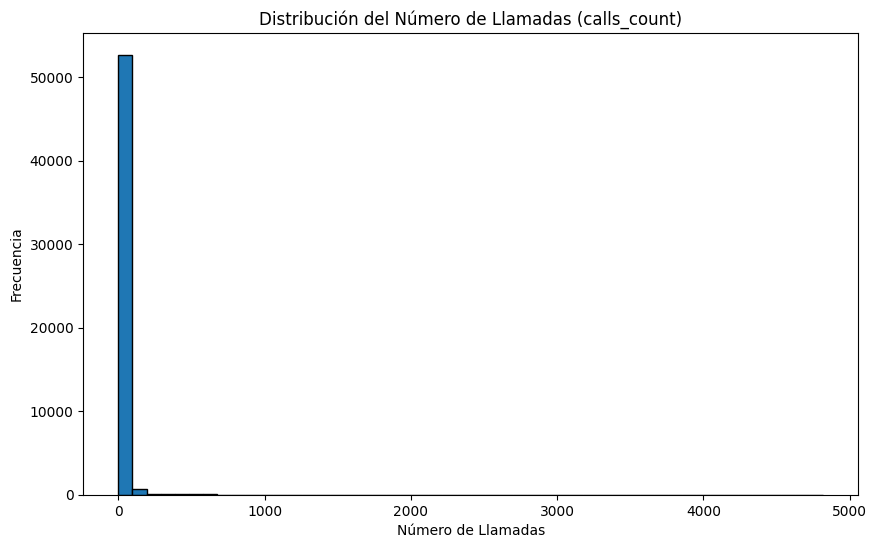

In [6]:
# Distribución del número de llamadas (calls_count)

plt.figure(figsize=(10, 6))
plt.hist(telecom_df['calls_count'], bins=50, edgecolor='black')
plt.title('Distribución del Número de Llamadas (calls_count)')
plt.xlabel('Número de Llamadas')
plt.ylabel('Frecuencia')
plt.show()

- La mayoría de los operadores realizan menos de 50 llamadas, pero hay una larga cola en la distribución con operadores con un número mucho mayor de llamadas, lo que indica que unos pocos operadores manejan un volumen muy alto.

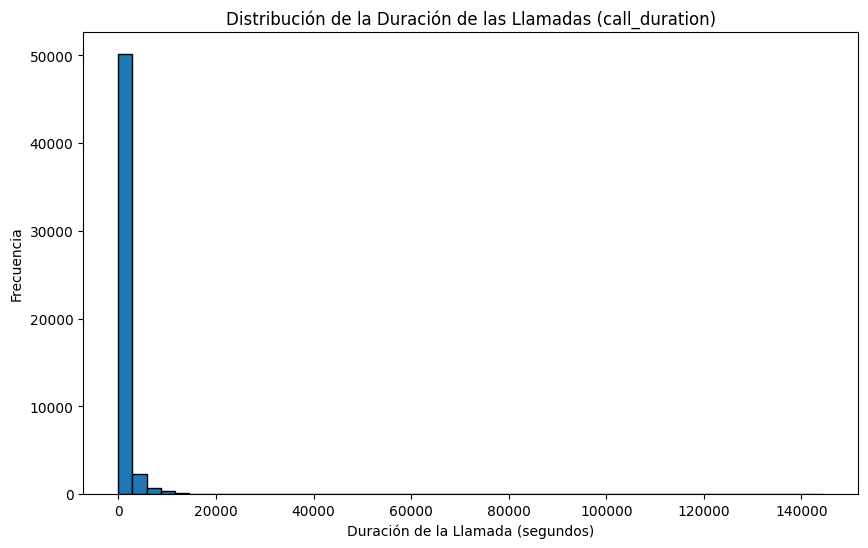

In [7]:
# Distribución de la duración de las llamadas (call_duration)

plt.figure(figsize=(10, 6))
plt.hist(telecom_df['call_duration'], bins=50, edgecolor='black')
plt.title('Distribución de la Duración de las Llamadas (call_duration)')
plt.xlabel('Duración de la Llamada (segundos)')
plt.ylabel('Frecuencia')
plt.show()

- La mayoría de las llamadas tienen una duración corta (cerca de 0 segundos), lo que puede indicar llamadas perdidas o muy breves.
- También hay una larga cola hacia la derecha, lo que muestra que algunas llamadas tienen duraciones excepcionalmente largas.

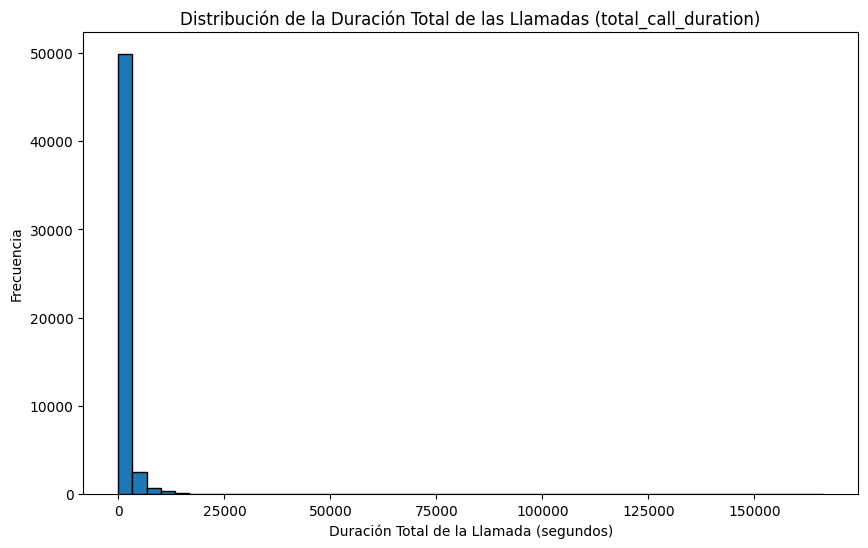

In [8]:
# Distribución de la duración total de las llamadas (total_call_duration)

plt.figure(figsize=(10, 6))
plt.hist(telecom_df['total_call_duration'], bins=50, edgecolor='black')
plt.title('Distribución de la Duración Total de las Llamadas (total_call_duration)')
plt.xlabel('Duración Total de la Llamada (segundos)')
plt.ylabel('Frecuencia')
plt.show()

- Similar a call_duration, pero con más valores altos, lo que sugiere que el tiempo de espera influye significativamente en la duración total.

### Analizar la distribución de llamadas internas y externas.

In [9]:
# Crear una tabla de distribución de llamadas internas y externas

call_distribution = telecom_df.groupby(['internal', 'direction']).size().reset_index(name='call_count')

# Filtrar para llamadas internas y externas separadamente

internal_calls = call_distribution[call_distribution['internal'] == True]
external_calls = call_distribution[call_distribution['internal'] == False]

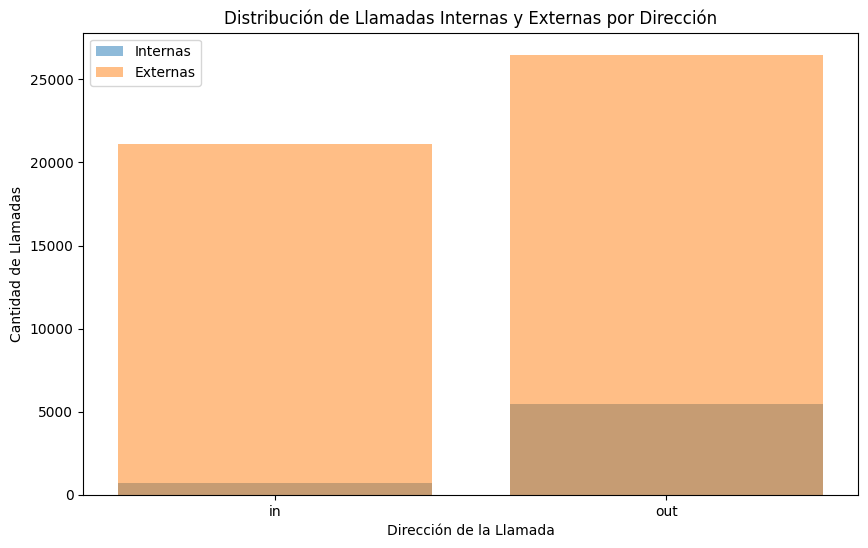

In [10]:
# Gráfico de barras para llamadas internas y externas

plt.figure(figsize=(10, 6))
plt.bar(internal_calls['direction'], internal_calls['call_count'], alpha=0.5, label='Internas')
plt.bar(external_calls['direction'], external_calls['call_count'], alpha=0.5, label='Externas')
plt.title('Distribución de Llamadas Internas y Externas por Dirección')
plt.xlabel('Dirección de la Llamada')
plt.ylabel('Cantidad de Llamadas')
plt.legend()
plt.show()

- Llamadas Internas: Hay más llamadas salientes internas que entrantes internas. Esto podría indicar que los operadores están utilizando las llamadas internas principalmente para la comunicación entre ellos.
- Llamadas Externas: Las llamadas externas también son más comunes en la dirección saliente que en la entrante, lo que puede indicar una tendencia a realizar llamadas a clientes.

### Analizar la correlación entre el número de llamadas perdidas y la duración del tiempo de espera.

In [11]:
# Crear una tabla de correlación específica para llamadas internas

internal_calls_data = telecom_df[telecom_df['internal'] == True].groupby('operator_id').agg({
    'is_missed_call': 'mean',  
    'total_call_duration': 'mean'  
}).reset_index()

# Crear una tabla de correlación específica para llamadas externas

external_calls_data = telecom_df[telecom_df['internal'] == False].groupby('operator_id').agg({
    'is_missed_call': 'mean',  
    'total_call_duration': 'mean'
}).reset_index()

In [12]:
# Calcular la correlación para llamadas internas y externas

correlation_internal = internal_calls_data['is_missed_call'].corr(internal_calls_data['total_call_duration'])
correlation_external = external_calls_data['is_missed_call'].corr(external_calls_data['total_call_duration'])

correlation_internal, correlation_external

(-0.42922582648334684, 0.25409758705190083)

- Llamadas Internas: La correlación entre la proporción de llamadas perdidas y la duración total promedio de las llamadas es de aproximadamente -0.43. Esta correlación negativa indica que, en las llamadas internas, a medida que aumenta el tiempo de espera, la proporción de llamadas perdidas tiende a disminuir. Esto puede ser un indicio de que las llamadas internas no suelen ser perdidas, incluso cuando tienen tiempos de espera largos.


- Llamadas Externas: La correlación es de 0.25, lo que indica una correlación positiva débil. Esto significa que para las llamadas externas, a medida que aumenta el tiempo de espera, la proporción de llamadas perdidas también tiende a aumentar ligeramente. Esta relación, aunque no es fuerte, nos indica que los tiempos de espera pueden estar afectando la eficacia en las llamadas externas.

### Identificar tendencias o patrones que podrían ayudar a identificar operadores ineficaces.

In [13]:
# Crear un resumen de estadísticas por operador para explorar patrones

operator_stats = telecom_df.groupby('operator_id').agg({
    'calls_count': 'sum',  
    'is_missed_call': 'mean',  
    'call_duration': 'mean',  
    'total_call_duration': 'mean',  
    'direction': lambda x: (x == 'out').sum()  
}).reset_index()

# Renombrar columnas para mayor claridad

operator_stats.columns = ['operator_id', 'total_calls', 'missed_call_rate', 'avg_call_duration', 'avg_total_call_duration', 'outgoing_calls']

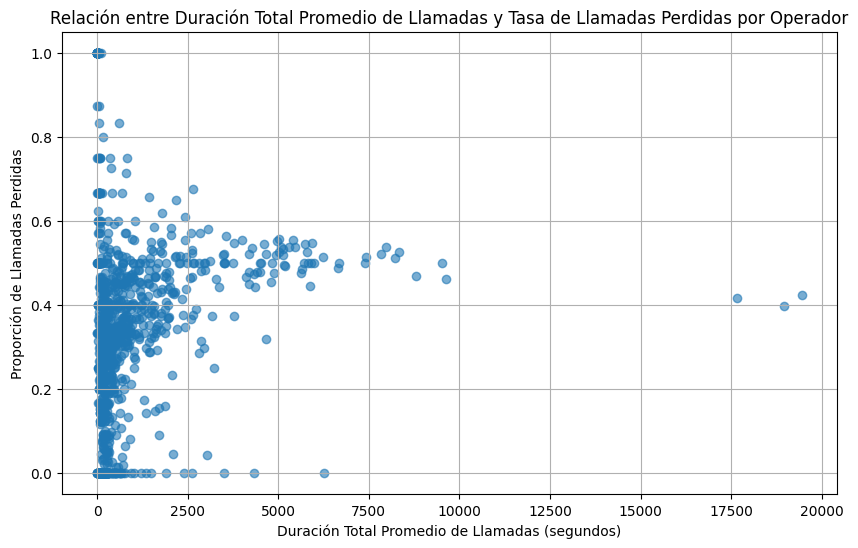

In [14]:
# Visualizar la relación entre la tasa de llamadas perdidas y la duración total promedio de las llamadas

plt.figure(figsize=(10, 6))
plt.scatter(operator_stats['avg_total_call_duration'], operator_stats['missed_call_rate'], alpha=0.6)
plt.title('Relación entre Duración Total Promedio de Llamadas y Tasa de Llamadas Perdidas por Operador')
plt.xlabel('Duración Total Promedio de Llamadas (segundos)')
plt.ylabel('Proporción de Llamadas Perdidas')
plt.grid(True)
plt.show()

- No parece haber una tendencia lineal clara entre la duración total de la llamada y la tasa de llamadas perdidas. Pero algunos operadores con tiempos de espera muy largos (alta duración total) tienden a tener tasas de llamadas perdidas más bajas.
- Podría ser útil investigar si hay factores adicionales que afecten tanto la duración de las llamadas como la tasa de llamadas perdidas.

### Calcular el número de llamadas realizadas por cada operador que realiza llamadas. 

In [15]:
# Filtrar llamadas salientes y agrupar por operador

outgoing_calls_by_operator = telecom_df[telecom_df['direction'] == 'out'].groupby('operator_id').agg({
    'calls_count': 'sum'  
}).reset_index()

outgoing_calls_by_operator.columns = ['operator_id', 'total_outgoing_calls']

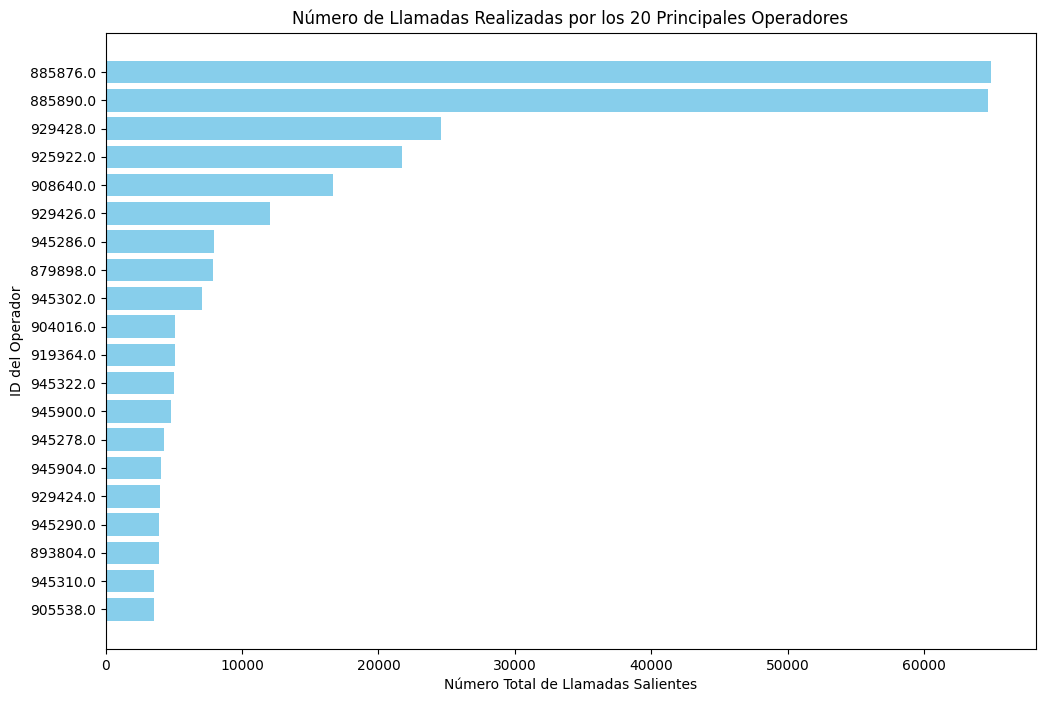

In [16]:
# Seleccionar los primeros 20 operadores con más llamadas salientes 

top_outgoing_calls = outgoing_calls_by_operator.sort_values(by='total_outgoing_calls', ascending=False).head(20)

# Crear el gráfico

plt.figure(figsize=(12, 8))
plt.barh(top_outgoing_calls['operator_id'].astype(str), top_outgoing_calls['total_outgoing_calls'], color='skyblue')
plt.title('Número de Llamadas Realizadas por los 20 Principales Operadores')
plt.xlabel('Número Total de Llamadas Salientes')
plt.ylabel('ID del Operador')
plt.gca().invert_yaxis() 
plt.show()

- Se observa que algunos operadores manejan un volumen significativamente mayor de llamadas que otros.

## Paso 3. Identificar operadores ineficaces

### Definir criterios de ineficacia.

Un operador se considera ineficaz si cumple con las siguientes condiciones:

1. Alta proporción de llamadas perdidas: Más del 50% de las llamadas del operador son perdidas.
2. Tiempo de espera promedio alto: El tiempo de espera promedio (total_call_duration) es mayor a 1000 segundos.
3. Bajo número de llamadas salientes: Si el operador debe realizar llamadas salientes, realiza menos de 10 llamadas.

### Filtrar operadores ineficaces.

In [17]:
# Calcular métricas en groupby por operador

operator_performance = telecom_df.groupby('operator_id').agg({
    'is_missed_call': 'mean',  
    'total_call_duration': 'mean',  
    'calls_count': 'sum',  
    'direction': lambda x: (x == 'out').sum()  
}).reset_index()

# Renombrar columnas

operator_performance.columns = ['operator_id', 'missed_call_rate', 'avg_total_call_duration', 'total_calls', 'outgoing_calls']

# Definir umbrales para los criterios de ineficacia

threshold_missed_calls = 0.5  
threshold_avg_duration = 1000  
threshold_outgoing_calls = 10  

# Filtrar operadores ineficaces que cumplen con todos los criterios

inefficient_operators = operator_performance[
    (operator_performance['missed_call_rate'] > threshold_missed_calls) &
    (operator_performance['avg_total_call_duration'] > threshold_avg_duration) &
    (operator_performance['outgoing_calls'] < threshold_outgoing_calls)
]

inefficient_operators

,operator_id,missed_call_rate,avg_total_call_duration,total_calls,outgoing_calls
574,928518.0,0.571429,2841.571429,337,7
735,938080.0,0.555556,5400.444444,742,9


Se identificaron segun los criterios, solamente 2 operadores ineficaces: 

Operador 928518:

- Tiene una tasa de llamadas perdidas de aproximadamente 57.1%, lo que indica que más de la mitad de sus llamadas no son atendidas.
- Su tiempo de espera promedio es de 2841 segundos, significativamente alto, lo cual es un indicador de ineficiencia en la gestión de tiempos de espera.
- Realiza solo 7 llamadas salientes, lo que sugiere una baja actividad o productividad en la realización de llamadas salientes.


Operador 938080:

- Presenta una tasa de llamadas perdidas del 55.6%, similar al primer operador, indicando también una alta proporción de llamadas no atendidas.
- Su tiempo de espera promedio es aún más alto, con 5400 segundos, lo que es un claro indicador de mala gestión de tiempos de espera.
- Realiza 9 llamadas salientes, un número bajo que sugiere ineficiencia en la realización de llamadas salientes.

## Paso 4. Prueba las hipótesis estadísticas

### Formulación de hipótesis.

Formulación de Hipótesis:

- Hipótesis Alternativa (H1): Existe una relación significativa entre la proporción de llamadas perdidas y la duración total promedio de la llamada.
- Hipótesis Nula (H0): No existe una relación significativa entre la proporción de llamadas perdidas y la duración total promedio de la llamada.

### Pruebas estadísticas.

In [18]:
# Prueba de correlación de Pearson para analizar la relación entre la proporción de llamadas perdidas y la duración total promedio de la llamada

corr, p_value = pearsonr(operator_performance['missed_call_rate'], operator_performance['avg_total_call_duration'])

inefficient = operator_performance[
    (operator_performance['missed_call_rate'] > threshold_missed_calls) &
    (operator_performance['avg_total_call_duration'] > threshold_avg_duration) &
    (operator_performance['outgoing_calls'] < threshold_outgoing_calls)
]

efficient = operator_performance[~operator_performance['operator_id'].isin(inefficient['operator_id'])]

(corr, p_value)

(0.2094461139582405, 2.729553629341756e-12)

- Coeficiente de Correlación (r): 0.21
- Valor p: 2.73e-12
- La correlación entre la proporción de llamadas perdidas y la duración total promedio de la llamada es positiva y débil (r = 0.21). Dado el valor p muy bajo (mucho menor que 0.05), podemos rechazar la hipótesis nula y concluir que existe una relación significativa entre estas dos variables.

In [19]:
# Prueba t para comparar la tasa de llamadas perdidas entre operadores ineficaces y eficaces

t_stat, p_val_ttest = ttest_ind(inefficient['missed_call_rate'], efficient['missed_call_rate'], equal_var=False)

(t_stat, p_val_ttest)

(23.5805363303604, 0.00011559255304398382)

- Estadístico t (t-stat): 23.58
- Valor p: 0.00012
- Existe una diferencia significativa en la tasa de llamadas perdidas entre operadores ineficaces y eficaces. El valor p es muy bajo (por debajo de 0.05), lo que nos permite rechazar la hipótesis nula de igualdad de medias.

In [20]:
# Prueba t para comparar la duración total promedio de llamadas entre operadores ineficaces y eficaces

t_stat_duration, p_val_duration = ttest_ind(inefficient['avg_total_call_duration'], efficient['avg_total_call_duration'], equal_var=False)

(t_stat_duration, p_val_duration)

(2.5486972709813895, 0.2374330700110242)

- Estadístico t (t-stat): 2.55
- Valor p: 0.237
- No se encontró una diferencia estadísticamente significativa en la duración total promedio de llamadas entre operadores ineficaces y eficaces. El valor p es superior a 0.05, por lo que no podemos rechazar la hipótesis nula.

### Interpretación de resultados.

Relación entre llamadas perdidas y duración total de llamada:

- Existe una relación significativa pero débil, lo que sugiere que otros factores pueden influir en la tasa de llamadas perdidas además de la duración de la llamada.

Diferencias en la tasa de llamadas perdidas: 

- Los operadores ineficaces tienen significativamente más llamadas perdidas que los eficaces, lo que valida que la proporción de llamadas perdidas es un buen indicador de ineficacia.

Duración total de las llamadas: 

- No hay una diferencia significativa en el tiempo de espera promedio entre operadores eficaces e ineficaces, lo que sugiere que este factor puede no ser tan determinante en la ineficacia.

## Paso 5. Conclusiones y Recomendaciones

Conclusiones

- El análisis sugiere que la proporción de llamadas perdidas es el factor más relevante para evaluar la ineficacia de los operadores. Los operadores que no responden a más del 50% de sus llamadas representan un problema que debe ser manejado con capacitación o mejoras en los sistemas de distribución de llamadas.

- Aunque el tiempo de espera es un factor importante en la satisfacción del cliente, por sí solo no mostró predecir la ineficacia del operador en el análisis. Sin embargo, sigue siendo importante para el rendimiento del operador y la experiencia del cliente, por lo que debe ser monitoreado y mejorado.

- El análisis muestra la necesidad de considerar múltiples factores (como la tasa de llamadas perdidas, el volumen de llamadas salientes y el tiempo de espera) en conjunto para tomar decisiones informadas sobre mejoras.

Recomendaciones

- Para mejorar la eficiencia operativa en CallMeMaybe, es crucial implementar estrategias como la del reentrenamiento de operadores y la optimización de los sistemas de distribución de llamadas.

- Incluir más datos sobre el rendimiento de los operadores (métricas de calidad de servicio o retroalimentación de clientes) podría darnos una visión más completa.

- Implementar intervenciones basadas en lo encontrado en este análisis y evaluar su impacto en la mejora de la eficiencia del operador.

El proyecto ha proporcionado una excelente base para la identificación de operadores ineficaces y ha mostrado cómo los análisis de datos pueden conducir a decisiones estratégicas de importancia para mejorar la eficiencia operativa en la industria de telecomunicaciones.

# Fuentes de estudio

- "EDA Best Practices: Tips and Tricks for Effective Data Exploration" (https://medium.com/python-in-plain-english/eda-best-practices-tips-and-tricks-for-effective-data-exploration-371e324fb525)

Este artículo brinda directrices útiles sobre cómo estructurar el EDA de manera eficiente, lo que me ayudó a organizar el análisis preliminar, como la detección de valores atípicos y el análisis de correlaciones entre las variables del dataset.

- "Delivering The Digital Contact Centre" (https://www2.deloitte.com/content/dam/Deloitte/uk/Documents/consultancy/deloitte-uk-delivering-the-digital-contact-centre.pdf)

Este informe fue útil para comprender las mejores prácticas en el análisis de rendimiento en centros de llamadas y cómo utilizar métricas de desempeño como el tiempo promedio de espera y la tasa de llamadas perdidas para medir la eficacia de los operadores.

- "Are You Tracking the Customer Service Metrics That Really Count? (https://hbr.org/2022/05/are-you-tracking-the-customer-service-metrics-that-really-count)

Este artículo me ayudó a tener más claras las métricas clave de ineficacia, como la tasa de llamadas perdidas y los tiempos de espera, y a justificar por qué son indicadores críticos para evaluar la eficiencia del servicio al cliente.

- Pandas Documentation (https://pandas.pydata.org/)

En general Pandas Documentation me ayudó a realizar la mayoría de las tareas de este proyecto. La página era consultada constantemente para poder hacer funcionar el código u optimizarlo utilizando soluciones alternativas. Es la principal fuente de consulta para los usuarios de python que analizan datos.

- Matplotlib Documentation (https://matplotlib.org/)

El paquete de Matplotlib fue fundamental para crear los gráficos de este proyecto por lo que la consulta de su documentación fue definitivamente critica para su culminación ya que los gráficos cuentan con muchos atributos que pueden ser muy confusos de memorizar.

- SciPy Documentation (https://docs.scipy.org/doc/scipy/)

SciPy fue utilizado para realizar la prueba de correlación de Pearson y las pruebas t de Student. Este análisis estadístico fue clave para confirmar o rechazar hipótesis. La consulta de su documentación fue muy importante ya que nunca habia realizado una prueba de correlación con ese nivel de complejidad.